# Presidential Approval Ratings

* Want to play around with slope graphs
* Start/Ending approval ratings seem like a good place to start

## Source
* [The American Presidency Project at UCSB](http://www.presidency.ucsb.edu/data.php) by John Woolley and Gerhard Peters for the approval rating data
    * Data is originally from Gallup Poll, compiled by Gerhard Peters
    * I went through the individual tables and aggregated them
* Wikipedia article on [List of Presidents of the United States](https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States#Presidents) for term dates

In [68]:
import math
import codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Open tab separated text file using codecs to avoid newline formatting issues
doc = codecs.open('president_approval_ratings.txt', 'rU', 'UTF-8')
df_ratings = pd.read_csv(doc, sep='\t')
df_ratings.head(5)

,President,Start Date,End Date,% Approval,% Disapproval,% No opinion/data
0,Harry S. Truman,5/29/1945,5/29/1945,86,2,10
1,Harry S. Truman,8/22/1945,8/22/1945,91,2,5
2,Harry S. Truman,10/3/1945,10/3/1945,80,8,10
3,Harry S. Truman,10/31/1945,10/31/1945,75,13,11
4,Harry S. Truman,1/3/1946,1/3/1946,63,22,14


* Great, but the column names need to be changed to make indexing easy
* Also probably a good idea to get those dates into datetime format

In [3]:
df_ratings.columns = ['pres',
                      'poll_start',
                      'poll_end',
                      'pct_app',
                      'pct_dis',
                      'pct_none']

# Convert M/D/YYYY to pandas datetime YYYY-MM-DD
df_ratings.poll_start = pd.to_datetime(df_ratings.poll_start)
df_ratings.poll_end = pd.to_datetime(df_ratings.poll_end)

df_ratings.head(5)

,pres,poll_start,poll_end,pct_app,pct_dis,pct_none
0,Harry S. Truman,1945-05-29,1945-05-29,86,2,10
1,Harry S. Truman,1945-08-22,1945-08-22,91,2,5
2,Harry S. Truman,1945-10-03,1945-10-03,80,8,10
3,Harry S. Truman,1945-10-31,1945-10-31,75,13,11
4,Harry S. Truman,1946-01-03,1946-01-03,63,22,14


* Now I want to find the list of Presidents that are represented here

In [106]:
presidents = df_ratings.pres.unique()
print '\n'.join(presidents)

Harry S. Truman
Dwight D. Eisenhower
John F. Kennedy
Lyndon B. Johnson
Richard Nixon
Gerald R. Ford
Jimmy Carter
Ronald Reagan
George Bush
William J. Clinton
George W. Bush
Barack Obama
Donald J. Trump


* How many presidents is that?

In [107]:
len(presidents)

13

* I would like to do a slope graph from the President's approval ratings at the start and end of their terms, so I need a list of those dates.
* Probably also use this to calculate monthly ratings, or ratings at intervals of the terms, etc.
* Thanks to [the List of US Presidents Wikipedia article](https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States#Presidents) I made a tab separated text file of the term dates

In [6]:
doc = codecs.open('president_terms.txt', 'rU', 'UTF-8')
df_terms = pd.read_csv(doc, sep='\t')
df_terms.columns = ['pres', 'term_start', 'term_end']

# Convert M/D/YYYY to pandas datetime YYYY-MM-DD
df_terms.term_start = pd.to_datetime(df_terms.term_start)
df_terms.term_end = pd.to_datetime(df_terms.term_end)
df_terms

,pres,term_start,term_end
0,Harry S. Truman,1945-04-12,1953-01-20
1,Dwight D. Eisenhower,1953-01-20,1961-01-20
2,John F. Kennedy,1961-01-20,1963-11-22
3,Lyndon B. Johnson,1963-11-22,1969-01-20
4,Richard Nixon,1969-01-20,1974-08-09
5,Gerald R. Ford,1974-08-09,1977-01-20
6,Jimmy Carter,1977-01-20,1981-01-20
7,Ronald Reagan,1981-01-20,1989-01-20
8,George Bush,1989-01-20,1993-01-20
9,William J. Clinton,1993-01-20,2001-01-20


In [7]:
df_terms['days_total'] = [int(i.days) for i in (df_terms.term_end - df_terms.term_start)]
df_terms

,pres,term_start,term_end,days_total
0,Harry S. Truman,1945-04-12,1953-01-20,2840
1,Dwight D. Eisenhower,1953-01-20,1961-01-20,2922
2,John F. Kennedy,1961-01-20,1963-11-22,1036
3,Lyndon B. Johnson,1963-11-22,1969-01-20,1886
4,Richard Nixon,1969-01-20,1974-08-09,2027
5,Gerald R. Ford,1974-08-09,1977-01-20,895
6,Jimmy Carter,1977-01-20,1981-01-20,1461
7,Ronald Reagan,1981-01-20,1989-01-20,2922
8,George Bush,1989-01-20,1993-01-20,1461
9,William J. Clinton,1993-01-20,2001-01-20,2922


In [11]:
# row = 0
# col = 0
# for i in df_terms.days_total:
#    for j in np.linspace(0,1,6):
#         df[row][col] = int(i*j)
#         row += 1
#     col += 1

NameError: name 'df' is not defined

In [9]:
# df_terms['term_25'] = df_terms['term_start'] + pd.Timedelta(days=(df_terms['days_total'][1]*i))

In [87]:
doc = codecs.open('president_approval.txt', 'rU', 'UTF-8')
df_rank = pd.read_csv(doc, sep='\t')
df_rank

,pres,p_0,p_20,p_40,p_60,p_80,p_100
0,Harry S. Truman,86.0,58.45,53.00,50.13,34.40,32.0
1,Dwight D. Eisenhower,68.0,66.83,69.70,66.95,55.43,59.0
2,John F. Kennedy,72.0,74.89,77.25,68.86,68.71,58.0
3,Lyndon B. Johnson,77.0,74.33,66.00,51.71,42.82,49.0
4,Richard Nixon,59.0,58.61,54.00,48.20,54.00,24.0
5,Gerald R. Ford,70.0,50.20,42.11,44.27,48.00,53.0
6,Jimmy Carter,66.0,62.55,45.20,42.35,38.48,34.0
7,Ronald Reagan,51.0,51.00,44.94,56.83,57.50,63.0
8,George Bush,51.0,61.42,68.92,70.55,56.72,56.0
9,William J. Clinton,58.0,48.20,46.03,56.36,62.87,66.0


In [88]:
df_rank.drop(['pres'], 1, inplace=True)
df_rank = df_rank.rank(axis=0, ascending=1, method='min')
df_rank = df_rank.set_index(df_terms.pres)
df_rank

,p_0,p_20,p_40,p_60,p_80,p_100
pres,,,,,,
Harry S. Truman,13.0,6.0,7.0,7.0,1.0,2.0
Dwight D. Eisenhower,8.0,10.0,12.0,11.0,9.0,10.0
John F. Kennedy,11.0,13.0,13.0,12.0,13.0,9.0
Lyndon B. Johnson,12.0,12.0,10.0,8.0,5.0,6.0
Richard Nixon,6.0,7.0,8.0,6.0,8.0,1.0
Gerald R. Ford,10.0,3.0,2.0,3.0,7.0,7.0
Jimmy Carter,7.0,9.0,5.0,2.0,4.0,4.0
Ronald Reagan,2.0,4.0,3.0,10.0,11.0,12.0
George Bush,2.0,8.0,11.0,13.0,10.0,8.0


In [99]:
ranks = df_rank.as_matrix()
ranks

array([[ 13.,   6.,   7.,   7.,   1.,   2.],
       [  8.,  10.,  12.,  11.,   9.,  10.],
       [ 11.,  13.,  13.,  12.,  13.,   9.],
       [ 12.,  12.,  10.,   8.,   5.,   6.],
       [  6.,   7.,   8.,   6.,   8.,   1.],
       [ 10.,   3.,   2.,   3.,   7.,   7.],
       [  7.,   9.,   5.,   2.,   4.,   4.],
       [  2.,   4.,   3.,  10.,  11.,  12.],
       [  2.,   8.,  11.,  13.,  10.,   8.],
       [  5.,   2.,   6.,   9.,  12.,  13.],
       [  4.,  11.,   9.,   4.,   3.,   4.],
       [  8.,   5.,   4.,   5.,   6.,  10.],
       [  1.,   1.,   1.,   1.,   2.,   3.]])

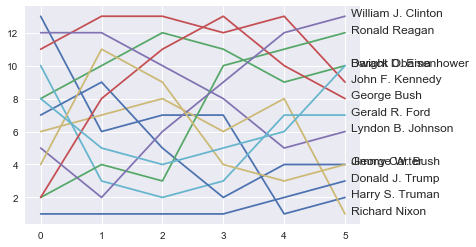

In [111]:
sns.set()
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range (0,13):
    plt.plot(ranks[i])
    ax.annotate(presidents[i], xy=(5.1, ranks[i][-1]))

In [108]:
presidents[0]

'Harry S. Truman'